# Time-dependent lab-frame measurements and time-independent rotating-frame measurements
This little introduction is used to give a code example for the simulation of a problem in the lab-frame and the rotating frame. Here, the Ramsey-measurement of a spin-1/2-system is investigated. In this case a Microwave with the frequency $\omega$ and amplitude $\Omega = B_1 \gamma_e$ is applied to the freely precesssing particle, with the larmor frequency $\omega = B_0 \gamma_e$.


The general (time-dependent) Hamiltonian of the system is given by:

$H = \omega_s \hat{S}_z + 2 \Omega \cos{(\omega t)} \hat{S}_x$

A transformation into the rotating frame (including the rotating wave approximation) finally yields the time-independent Hamiltonian: 

$H_\text{rot} = (\omega_s - \omega) \hat{S}_z + \Omega \hat{S}_x$

# Derivation of the Hamiltonian in the rotating frame
The oscillating field in the Hamiltonian $H$ can be decomposed in a left and right rotating field component: 
\begin{equation*}
H = \frac{\omega_s}{2} \hat{\sigma}_z + \Omega\cos{(\omega t)} \hat{\sigma}_x = \frac{\omega_s}{2} \hat{\sigma}_z + \frac{\Omega}{2} \left(\cos{(\omega t)} \hat{\sigma}_x + i \sin{(\omega t)} \hat{\sigma}_y \right) + \frac{\Omega}{2} \left( \cos{(\omega t)} \hat{\sigma}_x - i \sin{(\omega t)} \hat{\sigma}_y \right)
\end{equation*}

Introduction of the identity $\cos{(\omega t)} \hat{\sigma}_x \pm i \sin{(\omega t)} \hat{\sigma}_y = e^{\mp i \frac{\omega}{2}\hat{\sigma}_z t} \hat{\sigma}_x e^{\pm i \frac{\omega}{2}\hat{\sigma}_z t}$ simplifies the expression to 

\begin{equation*}
H = \frac{\omega_s}{2} \hat{\sigma}_z + \frac{\Omega}{2} \left(e^{- i \frac{\omega}{2}\hat{\sigma}_z t} \hat{\sigma}_x e^{i \frac{\omega}{2}\hat{\sigma}_z t} \right) + \frac{\Omega}{2} \left(e^{i \frac{\omega}{2}\hat{\sigma}_z t} \hat{\sigma}_x e^{- i \frac{\omega}{2}\hat{\sigma}_z t} \right)
\end{equation*}

For the unitary transformation of an operator the following relation can be obtained from the TD-SE:

\begin{equation*}
H' = UHU^\dagger + i\left( \frac{d}{dt}U \right)U^\dagger
\end{equation*}

In our case, the unitary transformation $U = e^{i\frac{\omega}{2}\hat{\sigma}_z t}$ is chosen. the first summand is obtained by:

\begin{equation*}
UHU^\dagger = e^{i\frac{\omega}{2}\hat{\sigma}_z t}\left[\frac{\omega_s}{2} \hat{\sigma}_z + \frac{\Omega}{2} \left(e^{- i \frac{\omega}{2}\hat{\sigma}_z t} \hat{\sigma}_x e^{i \frac{\omega}{2}\hat{\sigma}_z t} \right) + \frac{\Omega}{2} \left(e^{i \frac{\omega}{2}\hat{\sigma}_z t} \hat{\sigma}_x e^{- i \frac{\omega}{2}\hat{\sigma}_z t} \right)\right] e^{-i\frac{\omega}{2}\hat{\sigma}_z t} = \frac{\omega_s}{2} \hat{\sigma}_z + \frac{\Omega}{2} \hat{\sigma}_x + e^{i \omega\hat{\sigma}_z t} \hat{\sigma}_x e^{- i \omega\hat{\sigma}_z t}
\end{equation*}

Note that the last term is neglected in the rotating wave approximation, which can be applied for cases where $\frac{\Omega}{\omega} >> 1$ or $<< 1$

The second summand yields:

\begin{equation*}
i\left( \frac{d}{dt}  e^{i\frac{\omega}{2}\hat{\sigma}_z t} \right) e^{-i\frac{\omega}{2}\hat{\sigma}_z t} = \frac{\omega}{2} \hat{\sigma}_z 
\end{equation*}

Thus, the final expression of the Hamiltonian in the rotating frame is obtained:

\begin{equation*}
H_\text{rot} = \frac{\omega_s - \omega}{2} \hat{\sigma}_z + \frac{\Omega}{2} \hat{\sigma}_x
\end{equation*}


Sources:
Jonas Meinel, Quantifying Quantum Heterodyne and Non-linear Spectroscopy for Nanoscale Magnetic Resonance, p. 99 \\
Wikipedia, https://en.wikipedia.org/wiki/Unitary_transformation_(quantum_mechanics)


In [1]:
import numpy as np
import qutip as q
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Ramsey measurements in rotating frame

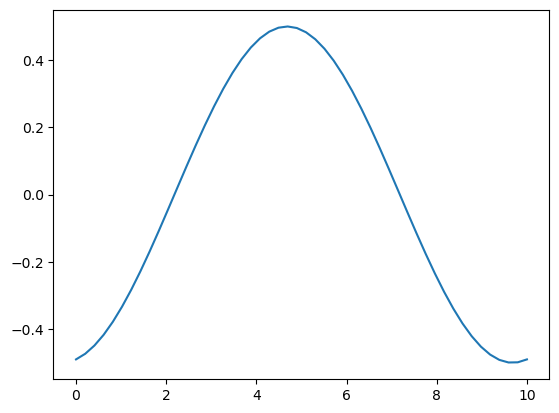

In [6]:
# Spin operators
sz = 0.5 * q.sigmaz()
sx = 0.5 * q.sigmax()
sy = 0.5 * q.sigmay()

# Initial state and parameters
rho_0 = q.fock_dm(2,0)
Omega = 2 * np.pi * 1           # Rabi-frequency [MHz]
Delta = 2 * np.pi * 0.1         # Detuning [MHz]
t_pi_2 = np.pi / (2 * Omega)    # Duration of pi/2 pulse [mus]

t_array = np.linspace(0,10,50)  # Propagation time between pulses [mus]

def propagate(rho, H, t):       # Unitary propagation of density matrix
    U = (-1j * H * t).expm()
    rho = U * rho * U.dag()
    return rho

res = []                        # Results of S_z measurements
for n,t in enumerate(t_array):
    rho = rho_0

    # 1st pi/2 pulse
    H = Delta * sz + Omega * sx
    rho = propagate(rho, H, t_pi_2)

    # Free precession
    H = Delta * sz
    rho = propagate(rho, H, t)

    # 2nd pi/2 pulse for readout
    H = Delta * sz + Omega * sx
    rho = propagate(rho, H, t_pi_2)
    res.append(q.expect(rho, sz))
plt.plot(t_array, res)
plt.show()

# Ramsey-measurement in lab-frame

  0%|          | 0/50 [00:00<?, ?it/s]

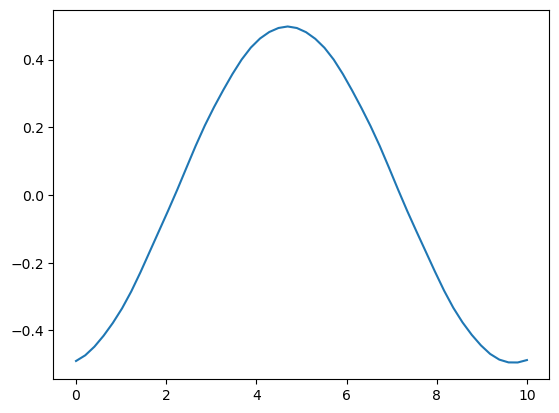

In [4]:
# Spin-operators
sz = 0.5 * q.sigmaz() 
sx = 0.5 * q.sigmax()
sy = 0.5 * q.sigmay()

rho_0 = q.fock_dm(2,0)      # Initial density matrix
Omega = 2 * np.pi * 1       # Rabi-Frequency [MHz]
w = 2 * np.pi * 100         # Microwave-Frequency [MHz]
Delta = 2 * np.pi * 0.1     # Detuning MW-freq and electron-larmor-freq [MHz]
ws = w + Delta              # Electron Larmor Frequency [MHz]

t_pi_2 = np.pi / (2 * Omega) # duration of a pi/2-pulse

def MW_Ham(t, w, Omega, rel_phase = 0, angle = 0):              # Definition of the Microwave Hamiltonian, angle defines pulse orientation
    phase_tot = t_passed * w % (2  * np.pi) + rel_phase         # Total phase of the pulse
    x_fact = 2 * (Omega * np.cos(w * t + phase_tot) ) * np.cos(angle)**2
    y_fact = 2 * (Omega * np.sin(w * t + phase_tot) ) * np.sin(angle)**2
    return x_fact * sx + y_fact * sy

def Hamiltonian(t, args):       # complete Hamltonian at a given timestep
    pulse_args = args['pulse_info'][2]
    Hamilt = MW_Ham(t, *pulse_args)
    return He + Hamilt          # He: base Hamiltonian

def create_pulse(dur, freq, power):     # Returns pulse object for MW_Ham from duration, frequency and power
    return [dur, MW_Ham, [freq, power, 0]]

def plot_exp(ex1):              # Can be used o visualize the applied pulse signal Omega * cos(wt+phi) at each timeframe 
    x = np.zeros(0)
    y = np.zeros(0)
    t_exp = 0
    for ex in ex1:
        if isinstance(ex, list) or isinstance(ex, np.ndarray):
            phase = t_exp * w % (2 * np.pi)
            x1 = np.linspace(0, ex[0], 200)
            y1 = np.cos(w * x1 + phase)
            x = np.append(x,x1 + t_exp)
            y = np.append(y,y1)
            t_exp += ex[0]
        elif isinstance(ex, float):
            x = np.append(x, np.linspace(t_exp, t_exp+ex,200))
            y = np.append(y, np.zeros(200))
            t_exp += ex
    plt.plot(x,y)
    plt.plot(x, np.cos(x), alpha = 0.3, linestyle = '-.')
    plt.show()

He = ws * sz    # time-independent base Hamiltonian for free precession

t_sweep = np.linspace(1e-12, 10, 50)  # sweep array for Ramsey measurement

res = []
for t1 in tqdm(t_sweep):
    rho = rho_0
    t_passed = 0        # time passed at beginning of each step of the sequence, needed for global pulse phase
    experiment = np.asarray([create_pulse(t_pi_2, w, Omega), t1, create_pulse(t_pi_2, w, Omega)], dtype=object)  # Ramsey
    # experiment = np.asarray([create_pulse(t1, w, Omega)], dtype = object)                          # Rabi oscillation      # To run a rabi-simulation uncomment this line and adjust the sweeping time with regard to Omega
    for exp in experiment:
        if isinstance(exp, list) or isinstance(exp, np.ndarray):    # check if exp is pulse object
            args = {'pulse_info': exp}
            sol = q.mesolve(Hamiltonian, rho, np.linspace(0, args['pulse_info'][0], 2), args = args, options = q.Options(nsteps = 100000))
            rho = sol.states[-1]                    # final state of the propagation is passed to rho
            t_passed += args['pulse_info'][0]       # Add laser duration to t_passed
        elif isinstance(exp, float):                # check if exp is time -> results in free precession with base Hamiltonian He
            sol = q.mesolve(He, rho, np.linspace(0,t1,2), options = q.Options(nsteps = 100000))
            rho = sol.states[-1]        # final state of the propagation is passed to rho
            t_passed += t1              # Add free precission time to t_passed
    #plot_exp(experiment)
    res.append(q.expect(rho, sz))
plt.plot(t_sweep, res)
plt.show()

# Conclusion
Both approaches yield the same result (keep in mind that in the rotating frame the rotation frequency is given by $\Delta$, while in the lab-frame the system rotates with the larmor frequency $\omega_s + \Delta$), but the lab frame simulation takes significantly longer to terminate. However, different parameter selection of $\Omega$ and $\omega_s$ influences the simulation speed.\\

Note: The shift of the Ramsey-measurement along the x-axis vanishes for larger $\frac{\Omega}{\Delta}$